In [1]:

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump
import matplotlib.cm as cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier


In [2]:
dataset = pd.read_pickle("clean_data")
print(dataset)


          age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323       0      1      0   
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373       0      0      1   
300  1.503641  0.706843 -1.029353 -0.378132  2.036303       0      0      1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862       0      1      0   

     cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca

In [3]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [4]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

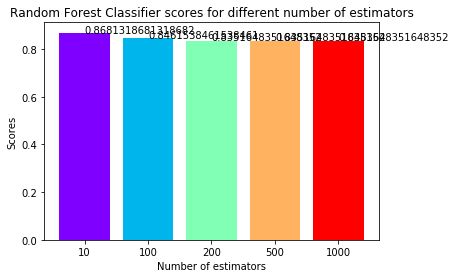

In [5]:
colors = cm.rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')


In [6]:
rf_scores

[0.8681318681318682,
 0.8461538461538461,
 0.8351648351648352,
 0.8351648351648352,
 0.8351648351648352]

In [7]:
rf_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
dump(rf_classifier, 'RandomForestClassifier.joblib.z')


['RandomForestClassifier.joblib.z']